In [1]:
theta1 = [0.31, 0.18, 0.65, 0.25, 5]  # true values
theta_n1 = [0.372, 0.216, 0.78, 0.3, 6.0] # nominal values +20%
theta_min1 = [0.155, 0.09, 0.325, 0.125, 2.5]   # minimum values -50%
theta_max1 = [0.465, 0.27, 0.975, 0.375, 7.5]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [2]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'rel',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 0.2,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.05,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
        'u2': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'dec',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 35,  # Maximum allowable signal level, des_opt space upper bound
            'min': 5,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 5,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 10],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.5
}

In [3]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/poster2/case 2/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n1
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs1
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins1
    }
}

In [16]:
des_opt = { # Design settings for the experiment
    'eps': 1e-4, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'meth': 'L',  # optimisation method, 'G': Global Differential Evolution, 'L': Local Pattern Search, 'GL': Global Differential Evolution refined with Local Pattern Search
    'md_ob': 'BFF',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'D',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'itr': {
        'pps': 30, # population size
        'maxmd': 60, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':20 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [ ]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=1, num_parallel_runs=16)

In [5]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta1,
    'errt': 'rel',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
    }
}

In [ ]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=1, swps=designs['swps'])

In [6]:
from middoe.log_utils import  read_excel
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [7]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [8]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.0581 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0521 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0550 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0519 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0542 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0609 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0627 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0589 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0642 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0576 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0603 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0580 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0602 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0512 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0521 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.0711 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0701 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0633 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0635 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0658 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0639 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0662 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0636 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0635 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0644 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0620 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0646 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0647 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0610 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0658 seconds.
Objective function: 'WLS'| model 'M' | C

In [9]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.3528264366093005, 0.18033296478485514, 0.680418628766513, 0.24332509151728116, 4.644470998803176]
True parameters of M: [0.372, 0.216, 0.78, 0.3, 6.0]
LS objective function value for M: 0.07119361684637181
T-values of model M: [0.01430779 0.00248808 0.0162632  0.97771904 0.01112669]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9996
  y2: 0.9988


Estimability analysis for round 1 is running
Parameter ranking from most estimable to least estimable for M in round 1: [3, 2, 0, 1, 4]
J_theta : 28.477446738548725
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 28.67507931660002
rC 1 parameters: 0.049408144512823604
rCKub parameters: 0.016469381504274534
rCC parameters: -0.32784353949857514
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 28.036869079593323
rC 2 parameters: -0.14685921965180052
rCKub parameters: -0.058743687860720206
rCC parameters: -0.26468592196518004
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 29.403000640184572
rC 3 parameters: 0.4627769508179238
rCKub parameters: 0.2313884754089619
rCC parameters: -0.12810192076517302


C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 29.056022754503157
rC 4 parameters: 0.5785760159544324
rCKub parameters: 0.3857173439696216
rCC parameters: -0.05119022133586487


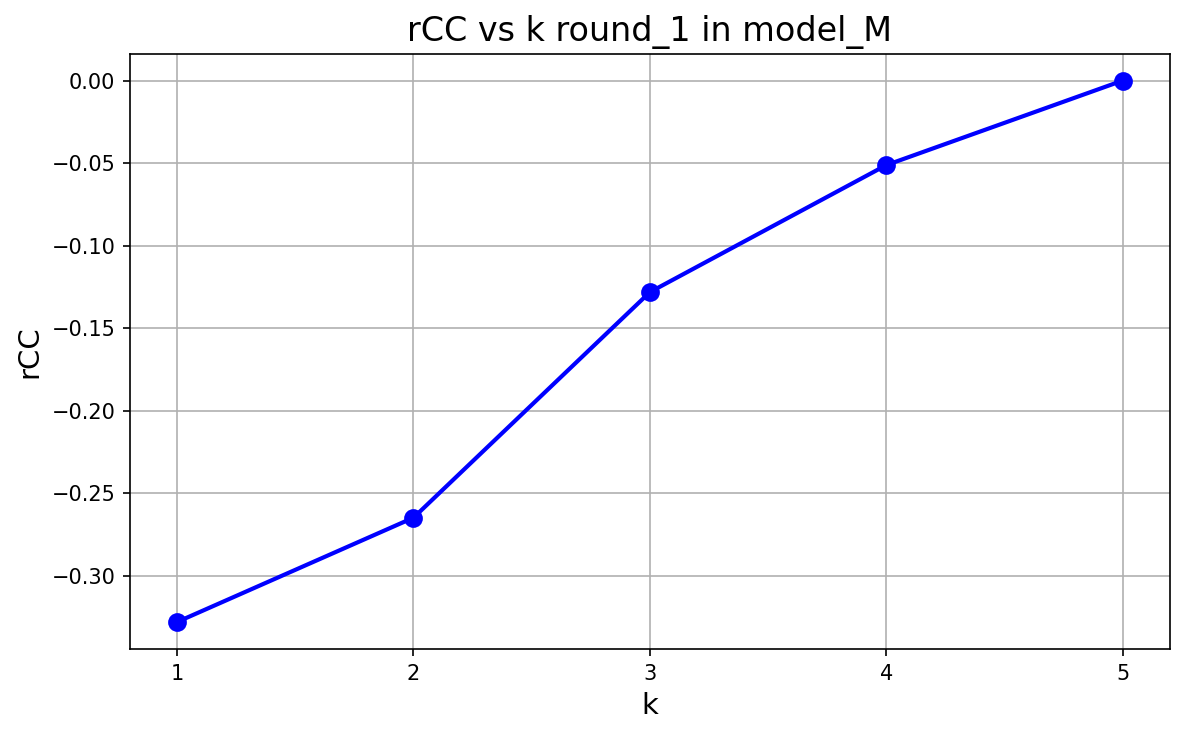

Optimal number of parameters to estimate for M: 1


In [10]:
from middoe.sc_estima import estima
j = 1
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


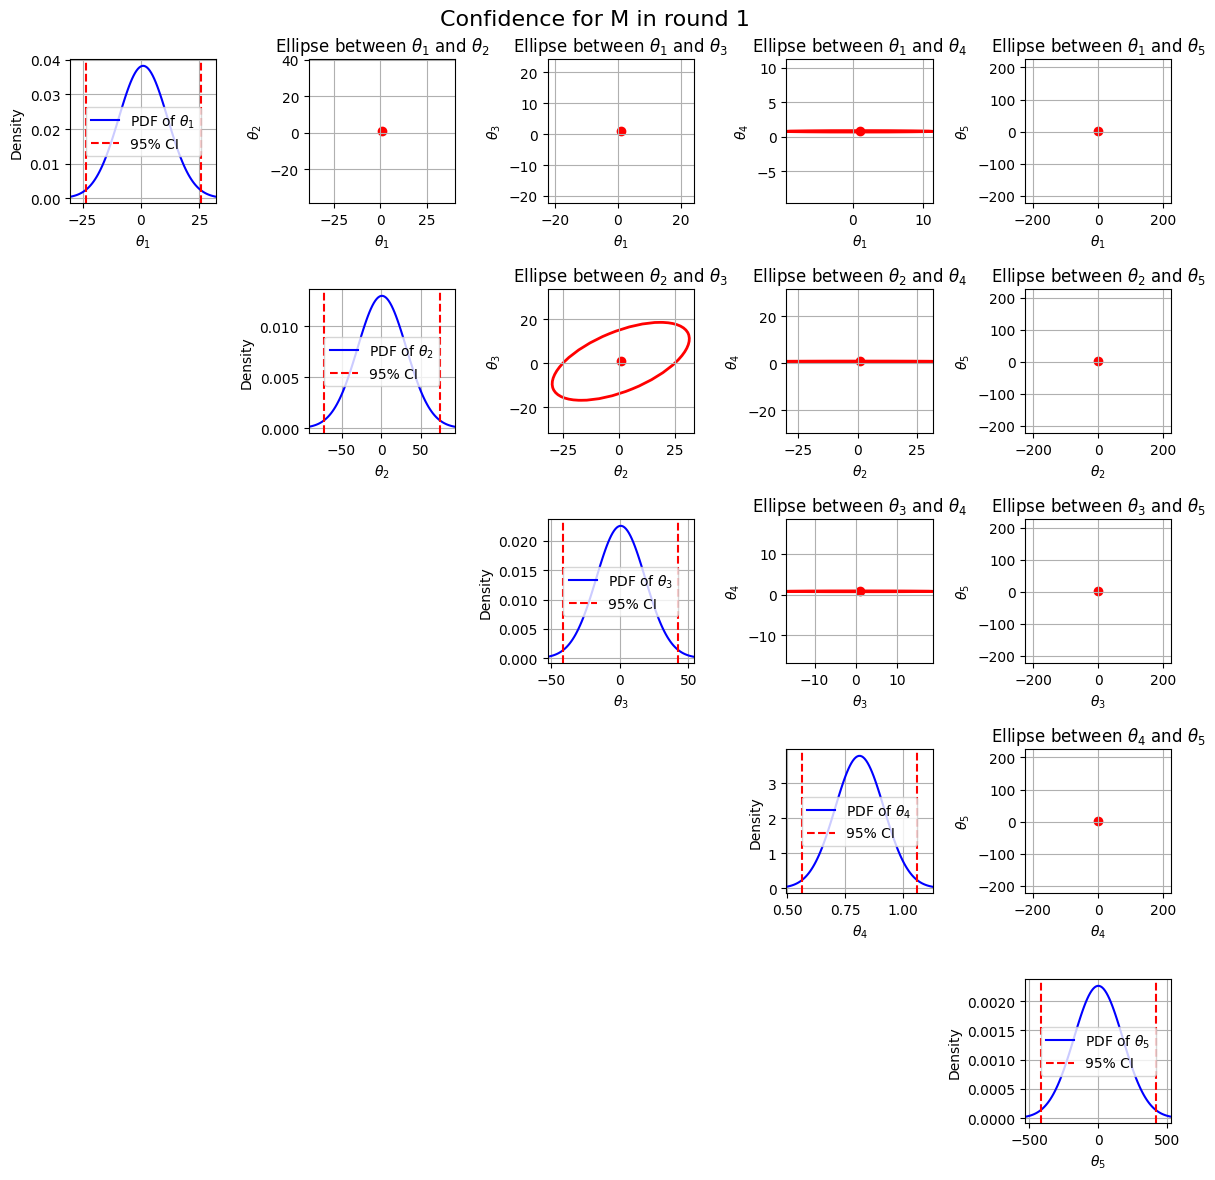

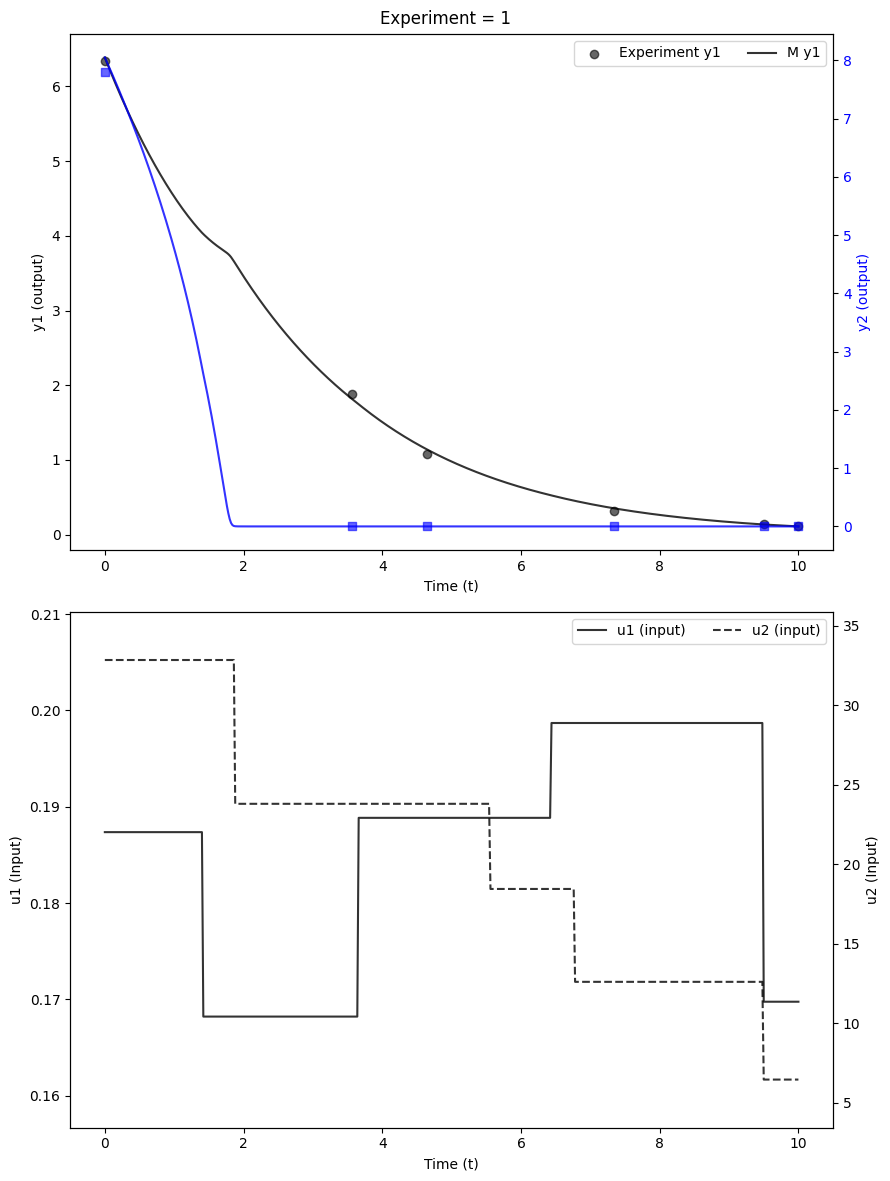

reference t value for model M and round 1: 2.3646242515927844
estimated t values for model M and round 1: [0.01430779 0.00248808 0.0162632  0.97771904 0.01112669]
P-value for model M and round 1: 100.0
eps for model M and round 1: 0.0001



{'M': np.float64(2.3646242515927844)}

In [11]:
from middoe.log_utils import  save_rounds
round_data={}
round = 1
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [17]:
models['theta']={'M': [0.3528264366093005, 0.18033296478485514, 0.680418628766513, 0.244671, 4.644470998803176]}


In [18]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=2, num_parallel_runs=16)

In [19]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=2, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster2/case 2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all    y10  \
 0        0.00  2.101212  0.106250      0.00  5.647809  0.273810   0.00  2.125   
 1        1.68  1.368355  0.070368      1.68  3.843417  0.184431   0.02  2.125   
 2        3.98  1.053950  0.049472      3.98  1.927791  0.102675   0.04  2.125   
 3        6.08  0.728699  0.040041      6.08  1.450708  0.072840   0.06  2.125   
 4        7.50  0.635306  0.035187      7.50  1.248573  0.062434   0.08  2.125   
 ..        ...       ...       ...       ...       ...       ...    ...    ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92  2.125   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94  2.125   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96  2.125   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98  2.125   
 500     

In [20]:
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [21]:
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.1261 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1275 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1349 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1323 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1338 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1233 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0915 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0955 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0990 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0931 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0803 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0863 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1124 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1072 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1203 seconds.
Objective function: 'WLS'| model 'M' | C

In [22]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.3467331350625128, 0.17987166628885992, 0.6891649196003681, 0.24478683441073198, 4.570057253311504]
True parameters of M: [0.3528264366093005, 0.18033296478485514, 0.680418628766513, 0.244671, 4.644470998803176]
LS objective function value for M: 0.2092986146481453
T-values of model M: [ 2.92205772  0.42498215  3.92002899 10.18971796  5.33120379]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9977
  y2: 0.9981


Estimability analysis for round 2 is running
Parameter ranking from most estimable to least estimable for M in round 2: [0, 3, 2, 1, 4]
J_theta : 83.71944585925812
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 78.34308105840249
rC 1 parameters: -1.3440912002139065
rCKub parameters: -0.4480304000713022
rCC parameters: -0.2413384000118837
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 73.8471252893481
rC 2 parameters: -3.2907735233033386
rCKub parameters: -1.3163094093213354
rCC parameters: -0.28953867616516693
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 71.61668642381449
rC 3 parameters: -6.051379717721815
rCKub parameters: -3.0256898588609076
rCC parameters: -0.3354741549050756
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 218.87237717352835
rC 4 parameters: 135.15293131427023
rCKub parameters: 134.15293131427023
rCC parameters: 5.548038804761259


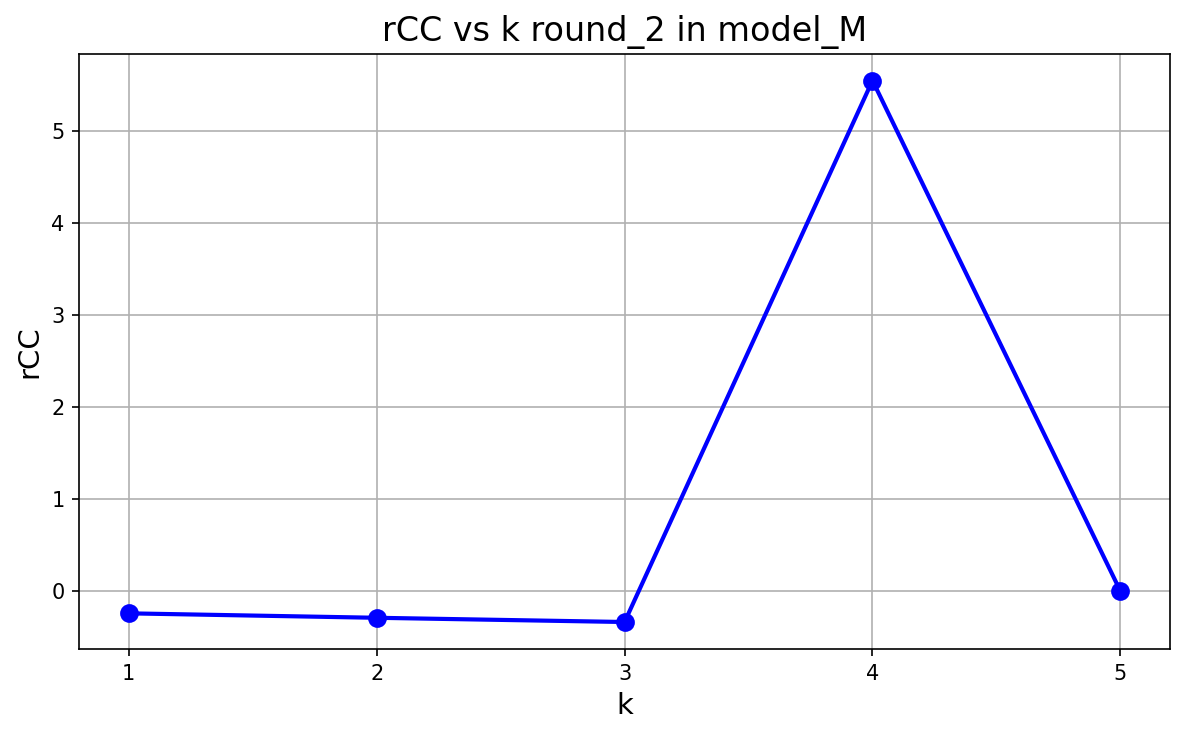

Optimal number of parameters to estimate for M: 3


In [23]:
j = 2
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


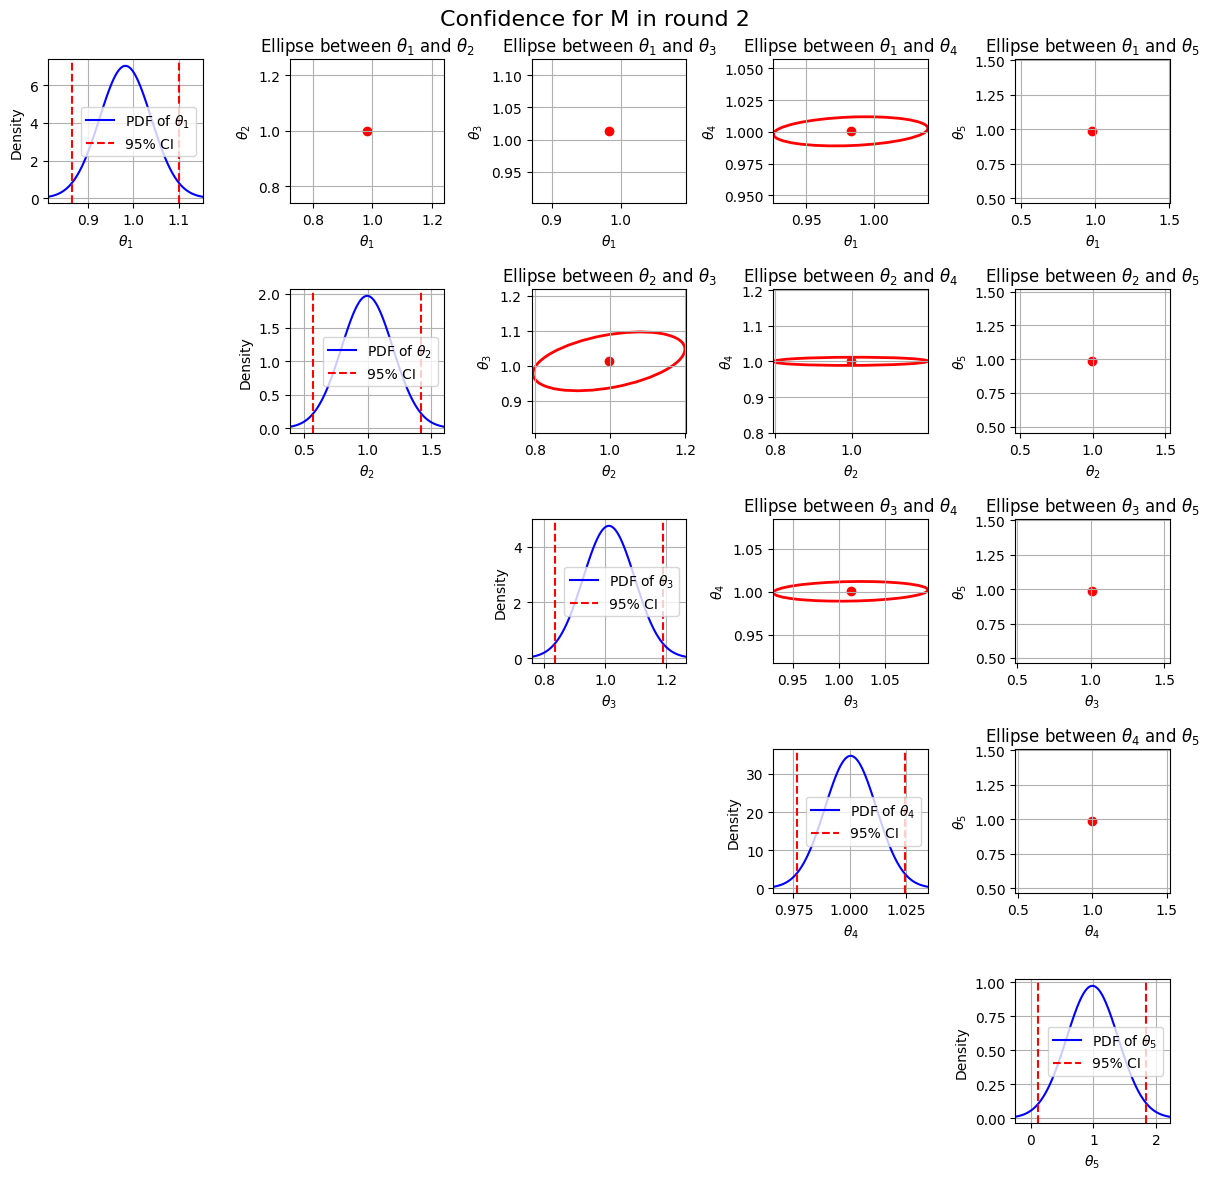

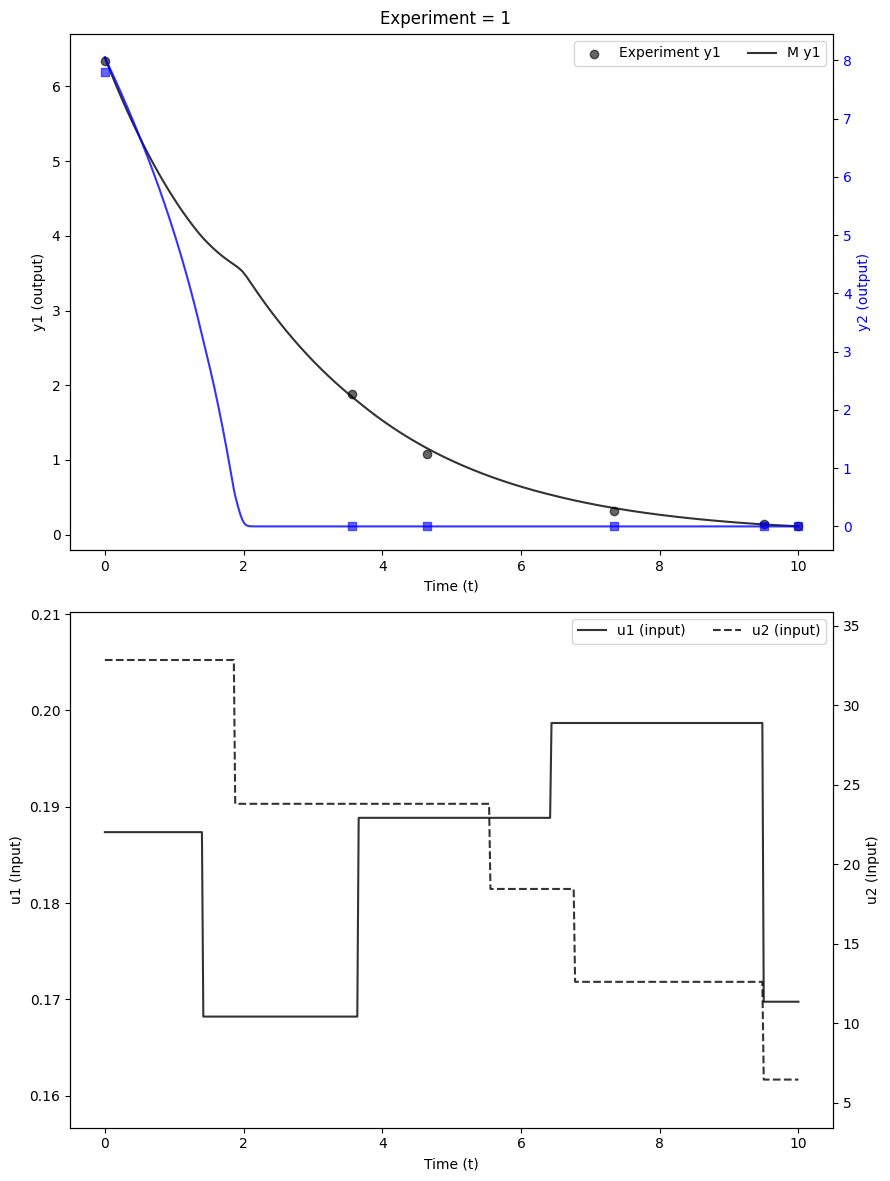

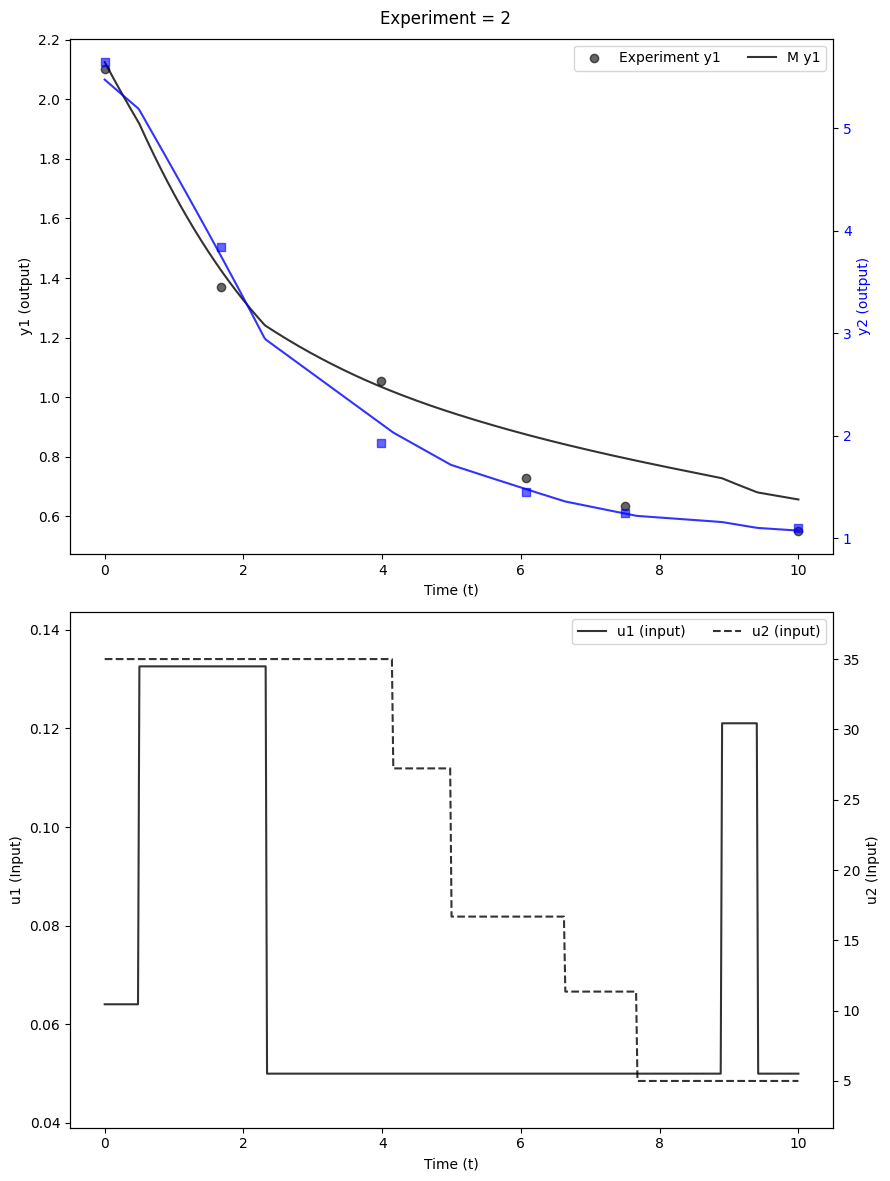

reference t value for model M and round 2: 2.093024054408263
estimated t values for model M and round 2: [ 2.92205772  0.42498215  3.92002899 10.18971796  5.33120379]
P-value for model M and round 2: 100.0
eps for model M and round 2: 0.0001



{'M': np.float64(2.093024054408263)}

In [24]:
round = 2
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [25]:
models['theta']={'M': [0.3304, 0.17987166628885992, 0.6603, 0.2448, 4.570057253311504]}

In [26]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=3, num_parallel_runs=16)

In [27]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=3, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster2/case 2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2      MES_E:y2  X:all  \
 0        0.00  9.597724  0.473429      0.00  9.856023  4.866428e-01   0.00   
 1        1.12  6.512717  0.329742      1.12  8.177473  3.680310e-01   0.02   
 2        3.98  3.404781  0.165585      3.98  2.760329  1.398538e-01   0.04   
 3        7.76  0.730292  0.036527      7.76  0.000000  3.036973e-12   0.06   
 4        9.50  0.365069  0.017697      9.50  0.000000  8.804684e-12   0.08   
 ..        ...       ...       ...       ...       ...           ...    ...   
 496       NaN       NaN       NaN       NaN       NaN           NaN   9.92   
 497       NaN       NaN       NaN       NaN       NaN           NaN   9.94   
 498       NaN       NaN       NaN       NaN       NaN           NaN   9.96   
 499       NaN       NaN       NaN       NaN       NaN           NaN   9.98   
 500       NaN       NaN       NaN       N

In [28]:
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [29]:
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.1801 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1962 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1945 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1785 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1941 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1673 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1663 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1615 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1650 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1609 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1628 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1747 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1861 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1862 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1955 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.1790 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1789 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1820 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1826 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1804 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1761 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1775 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1818 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1810 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1775 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1823 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1726 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1789 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1789 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1795 seconds.
Objective function: 'WLS'| model 'M' | C

In [30]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.3309081969076655, 0.17196271965991194, 0.6342512740675982, 0.23134769196773114, 4.569533833823681]
True parameters of M: [0.3304, 0.17987166628885992, 0.6603, 0.2448, 4.570057253311504]
LS objective function value for M: 1.707871163565668
T-values of model M: [70.5046433   8.32465725 62.63649283 55.09533538 58.34202929]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9980
  y2: 0.9919


Estimability analysis for round 3 is running
Parameter ranking from most estimable to least estimable for M in round 3: [3, 0, 2, 1, 4]
J_theta : 683.1484654262673
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 1130.9361335635983
rC 1 parameters: 111.94691703433276
rCKub parameters: 110.94691703433276
rCC parameters: 12.216324114925861
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 746.0157399759162
rC 2 parameters: 20.95575818321629
rCKub parameters: 19.95575818321629
rCC parameters: 1.5796465152680241
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 792.8754230903326
rC 3 parameters: 54.86347883203263
rCKub parameters: 53.86347883203263
rCC parameters: 2.9368599351129236
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 587.7739112678502
rC 4 parameters: -95.37455415841714
rCKub parameters: -63.58303610561143
rCC parameters: -1.7939732251558729


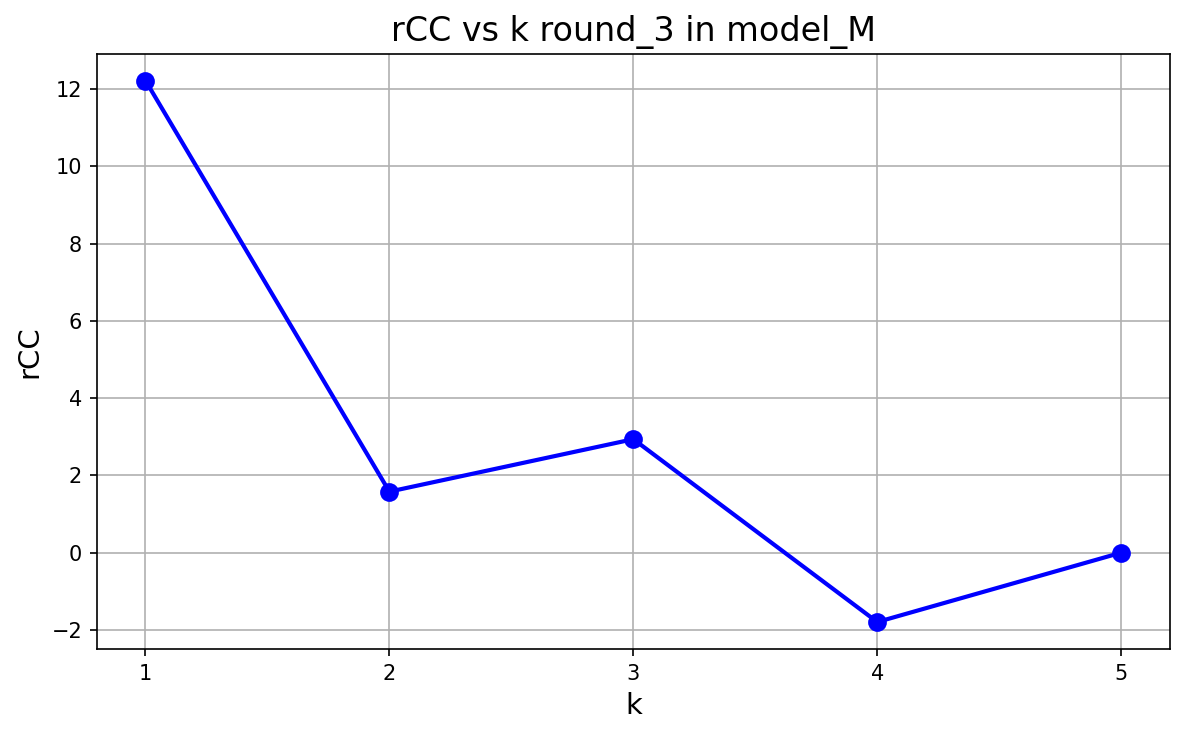

Optimal number of parameters to estimate for M: 4


In [31]:
j = 3
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


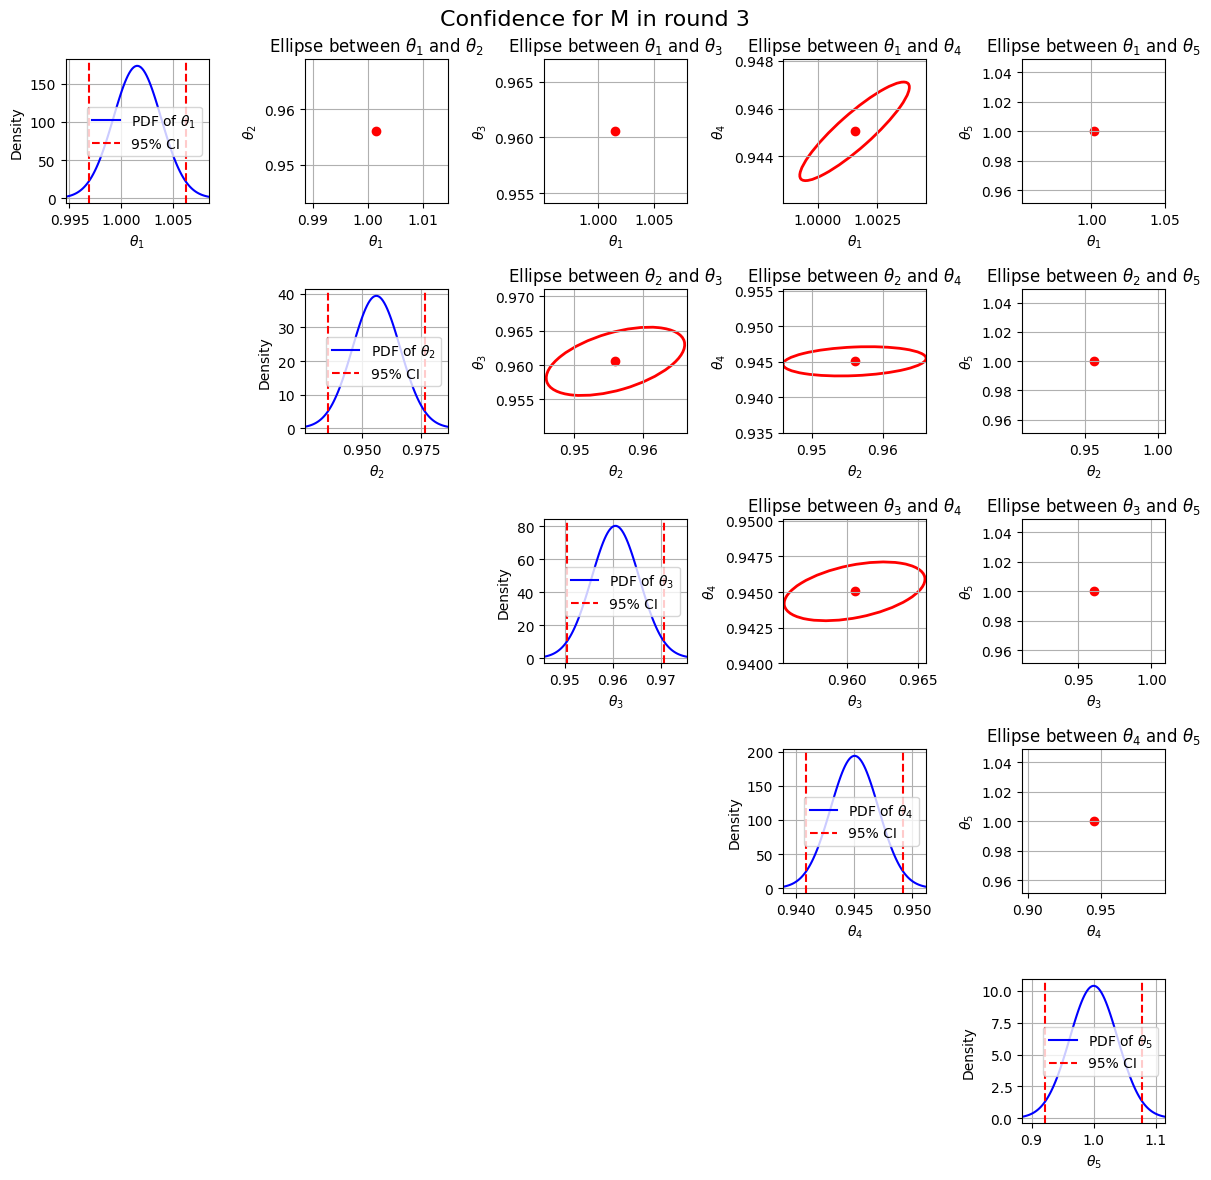

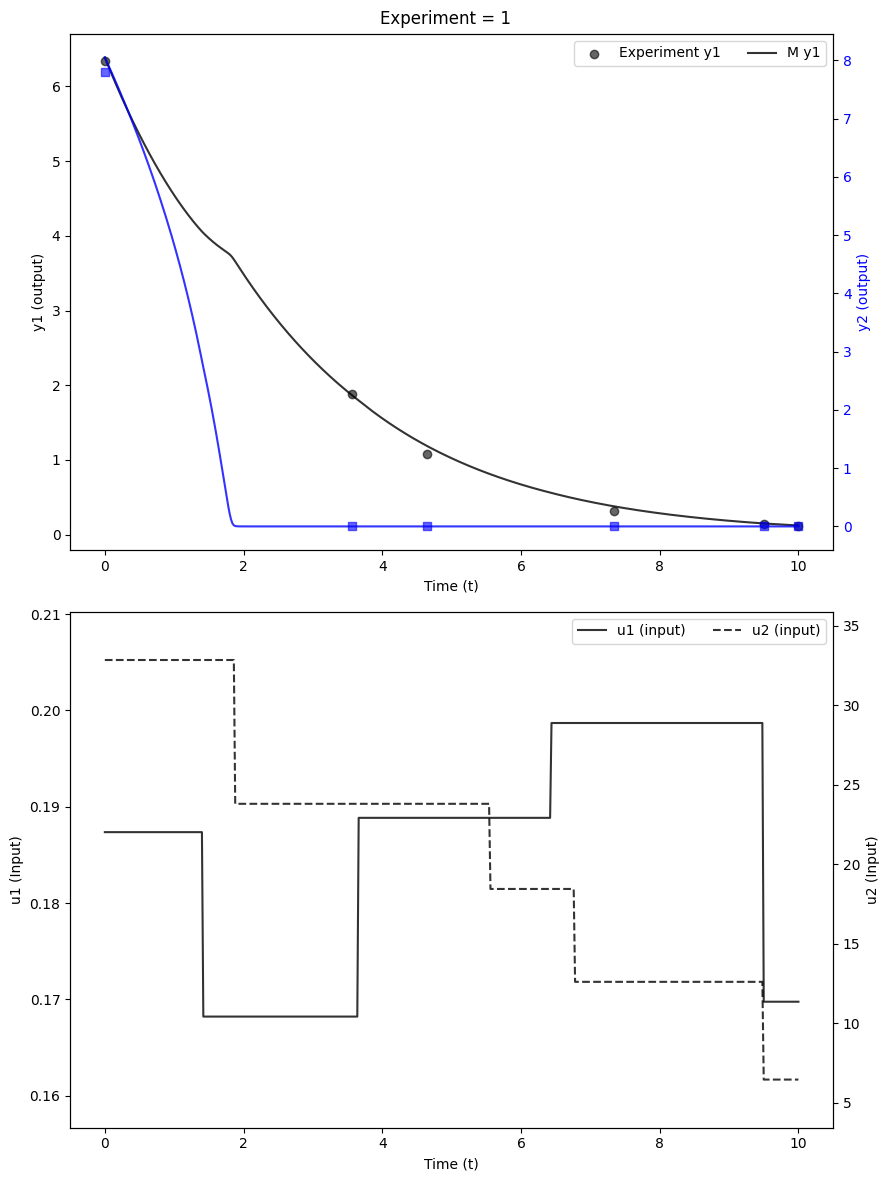

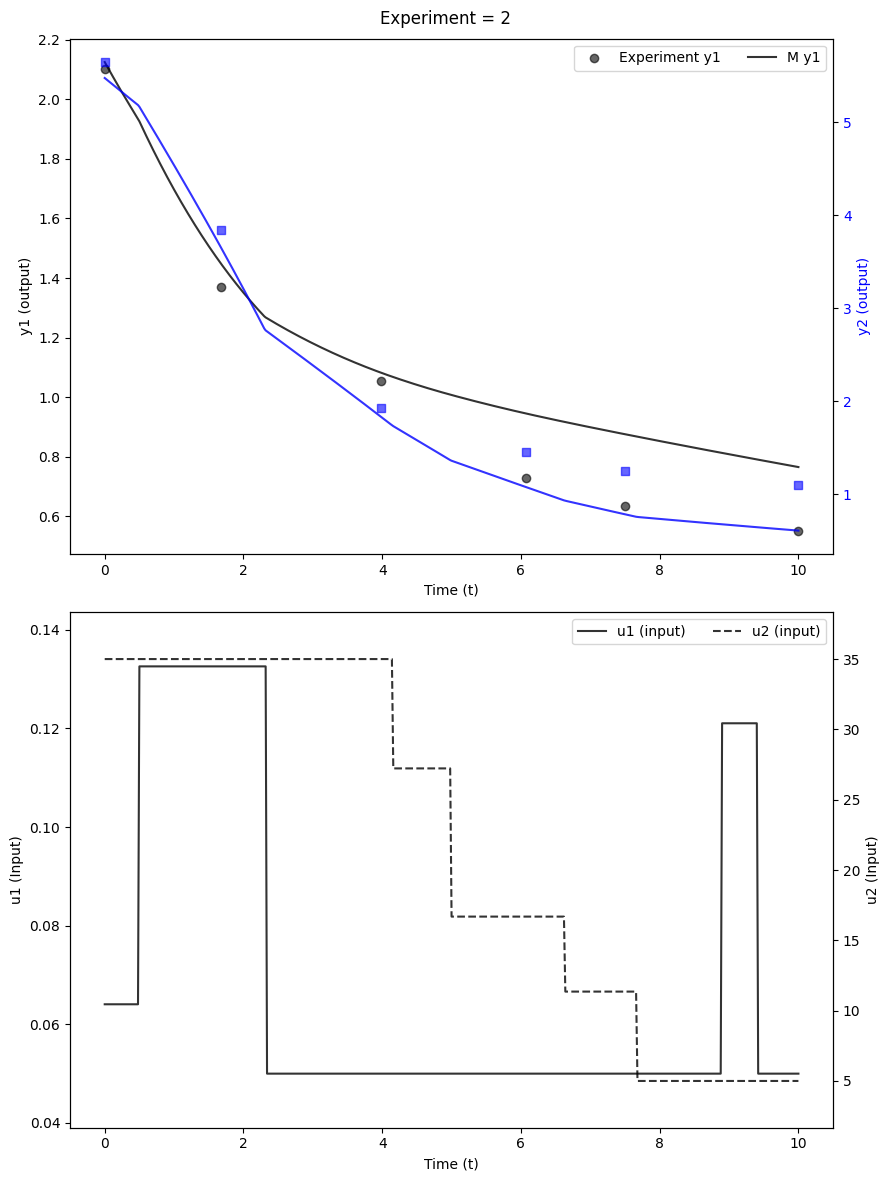

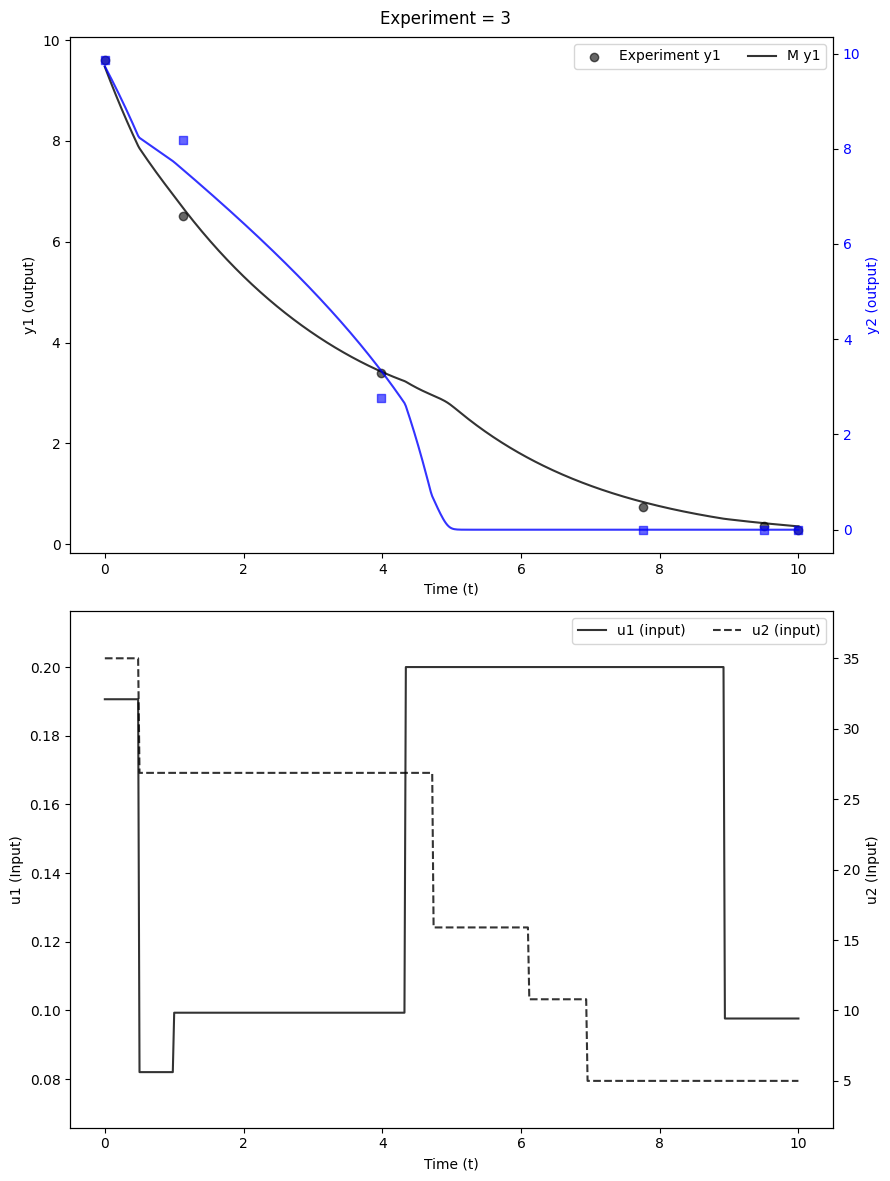

reference t value for model M and round 3: 2.0395134463964077
estimated t values for model M and round 3: [70.5046433   8.32465725 62.63649283 55.09533538 58.34202929]
P-value for model M and round 3: 100.0
eps for model M and round 3: 0.0001



{'M': np.float64(2.0395134463964077)}

In [32]:
round = 3
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [33]:
models['theta']={'M': [0.3359, 0.1780, 0.6392, 0.2431, 4.569533833823681]}


In [34]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=4, num_parallel_runs=16)

In [35]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=4, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster2/case 2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all  \
 0        0.00  5.878275  0.300539      0.00  9.970342  0.498352   0.00   
 1        0.50  5.114804  0.250359      0.50  9.178595  0.463079   0.02   
 2        2.10  2.922088  0.142992      2.10  6.802217  0.353138   0.04   
 3        3.40  1.808303  0.094064      3.40  5.084757  0.266242   0.06   
 4        3.98  1.629767  0.080406      3.98  4.503066  0.234653   0.08   
 ..        ...       ...       ...       ...       ...       ...    ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98   
 500       NaN       NaN       NaN       NaN       NaN       NaN  10.00   
 
         

In [36]:
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [37]:
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.2646 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2706 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2541 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2517 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2313 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2231 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1721 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1738 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1679 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1755 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1748 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1724 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2464 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2352 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2589 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.2326 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2722 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2885 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2287 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2306 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2513 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2577 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2544 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2600 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2579 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2673 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2817 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2737 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2661 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2638 seconds.
Objective function: 'WLS'| model 'M' | C

In [38]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.33359123890949904, 0.17045230802742248, 0.619022445962234, 0.23039874051767348, 4.527266978818574]
True parameters of M: [0.3359, 0.178, 0.6392, 0.2431, 4.569533833823681]
LS objective function value for M: 3.2082423833627853
T-values of model M: [17.91524144  2.36138684 16.2681688  42.53323778 48.88236851]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9979
  y2: 0.9901


Estimability analysis for round 4 is running
Parameter ranking from most estimable to least estimable for M in round 4: [0, 3, 2, 1, 4]
J_theta : 1283.2969533451142


C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 1484.801354208561
rC 1 parameters: 50.3761002158617
rCKub parameters: 49.3761002158617
rCC parameters: 4.031341684655141
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 1092.0191059282877
rC 2 parameters: -63.759282472275494
rCKub parameters: -25.5037129889102
rCC parameters: -1.6564820618068874
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 1905.77327635757
rC 3 parameters: 311.2381615062279
rCKub parameters: 310.2381615062279
rCC parameters: 12.88492339609283
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 1104.6052205170583
rC 4 parameters: -178.69173282805582
rCKub parameters: -119.12782188537055
rCC parameters: -2.50266295594522


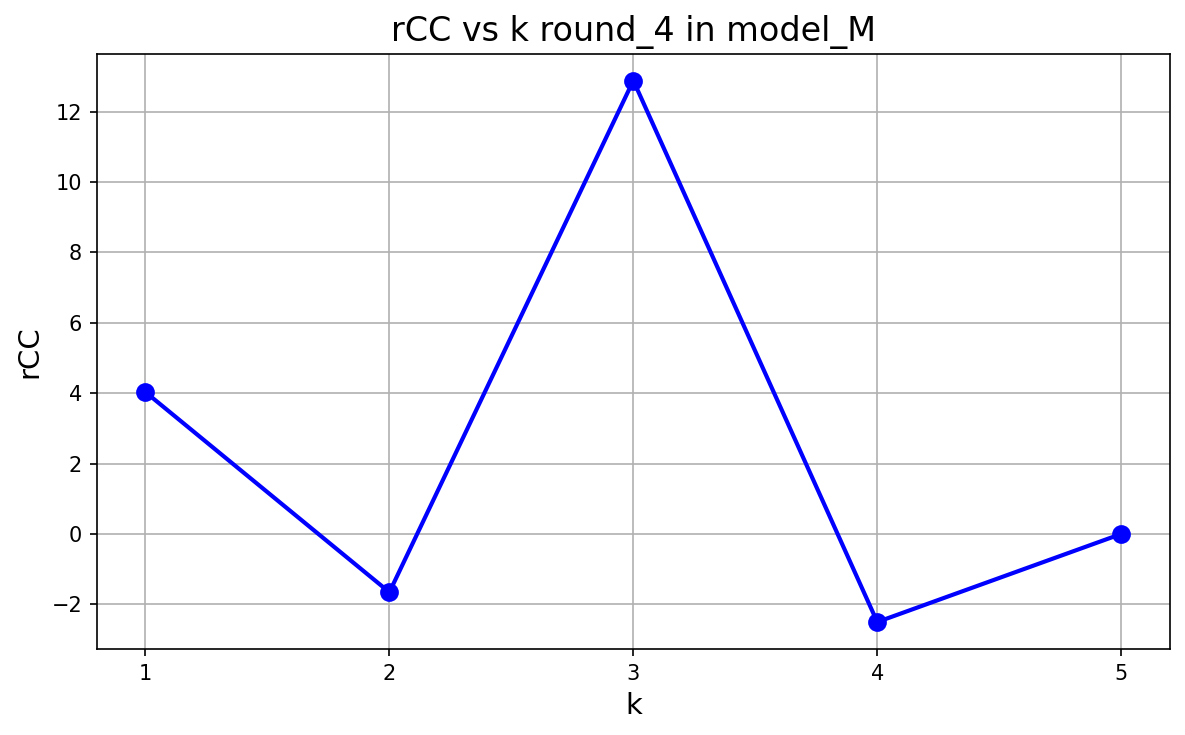

Optimal number of parameters to estimate for M: 4


In [39]:
j = 4
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


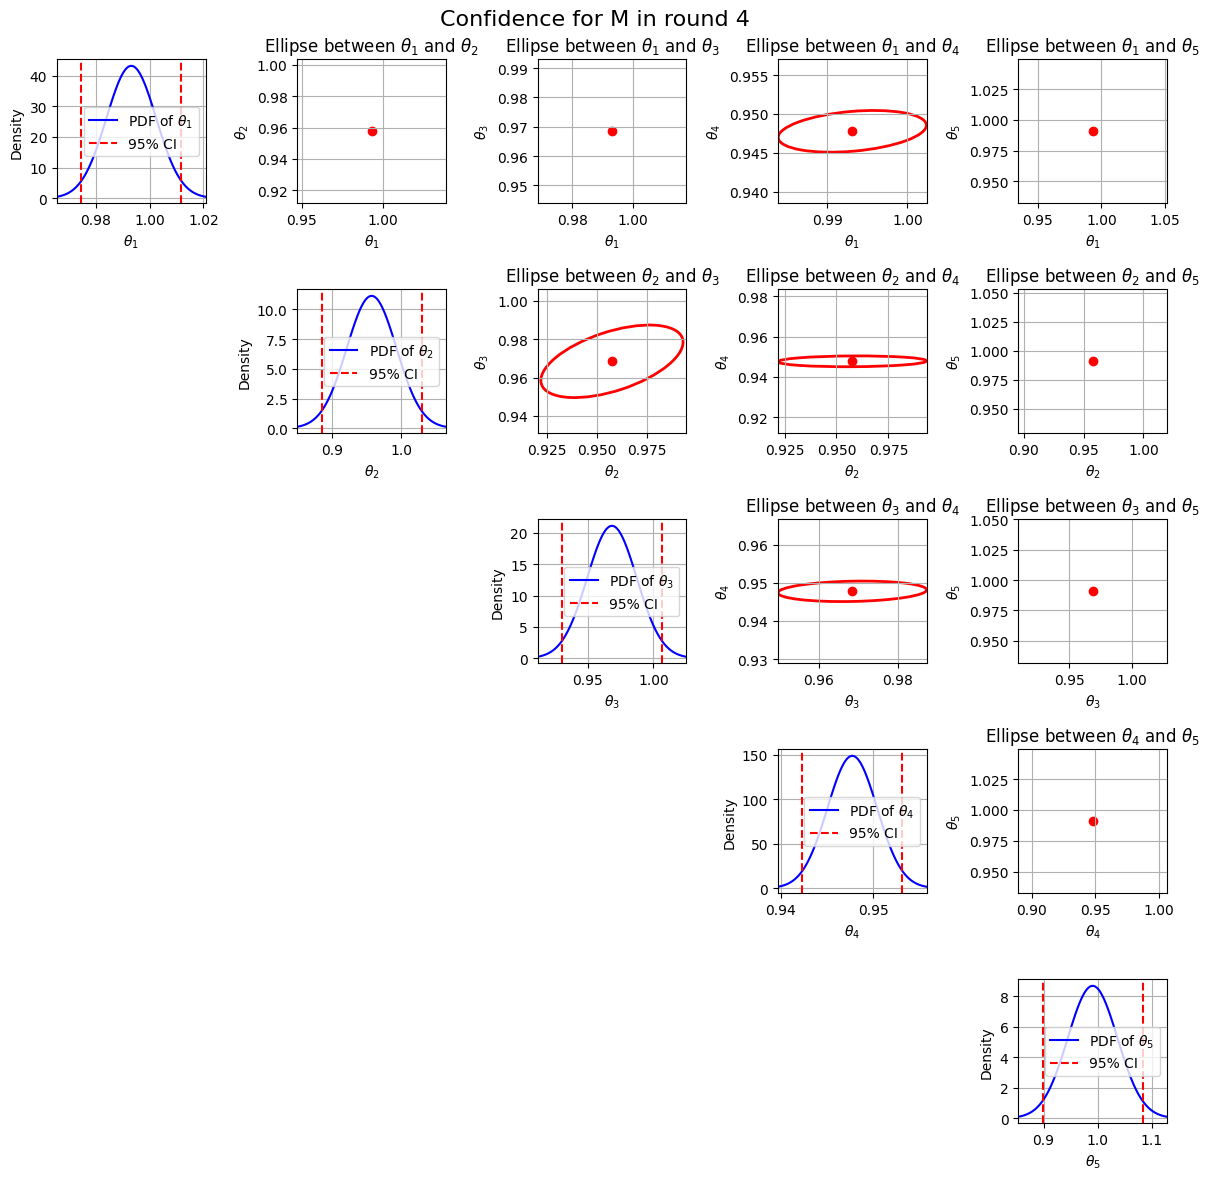

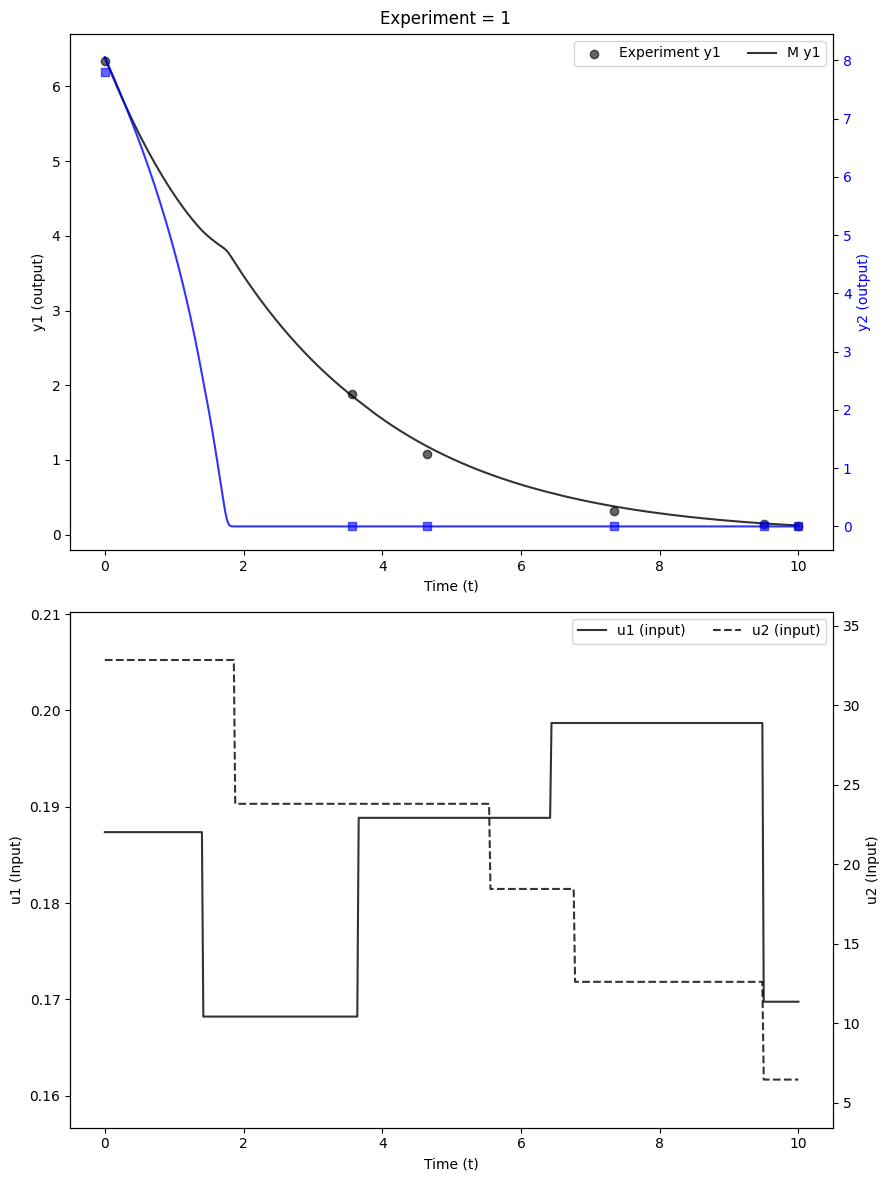

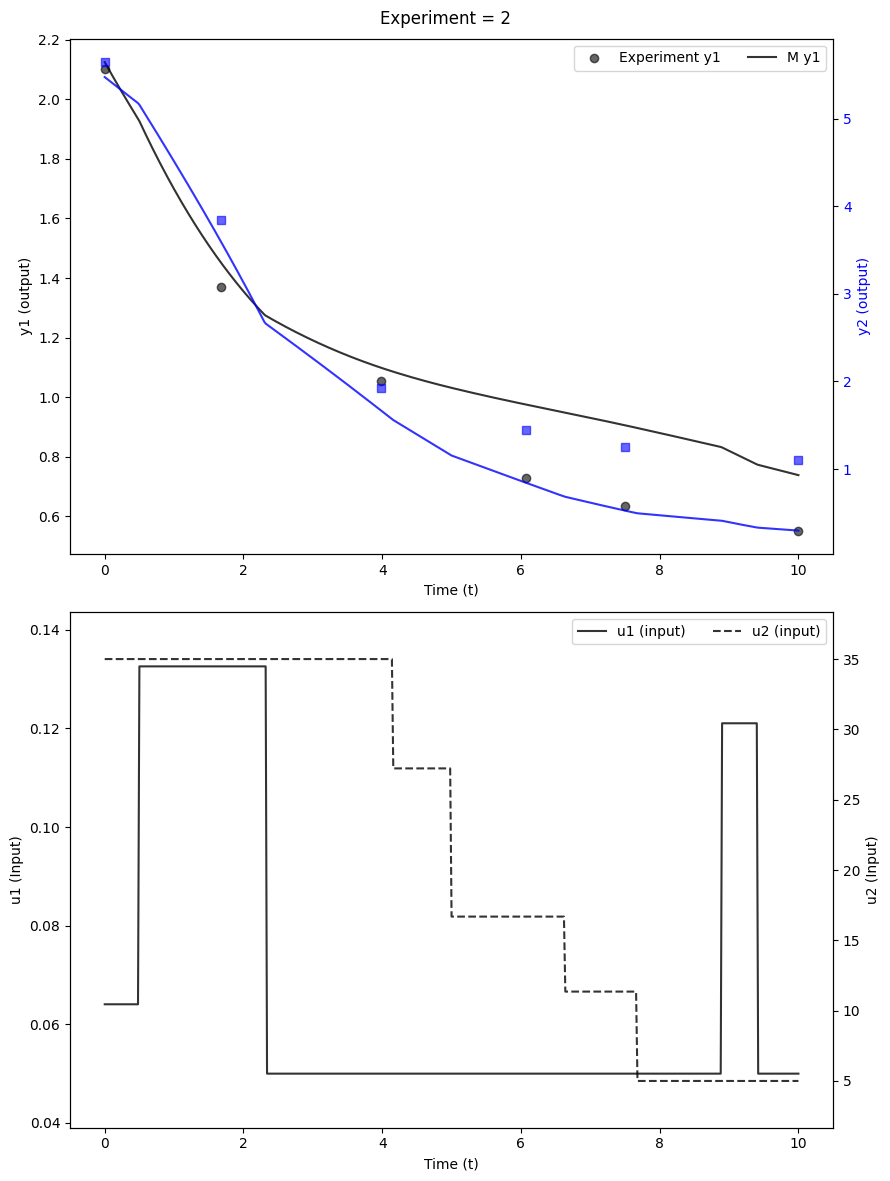

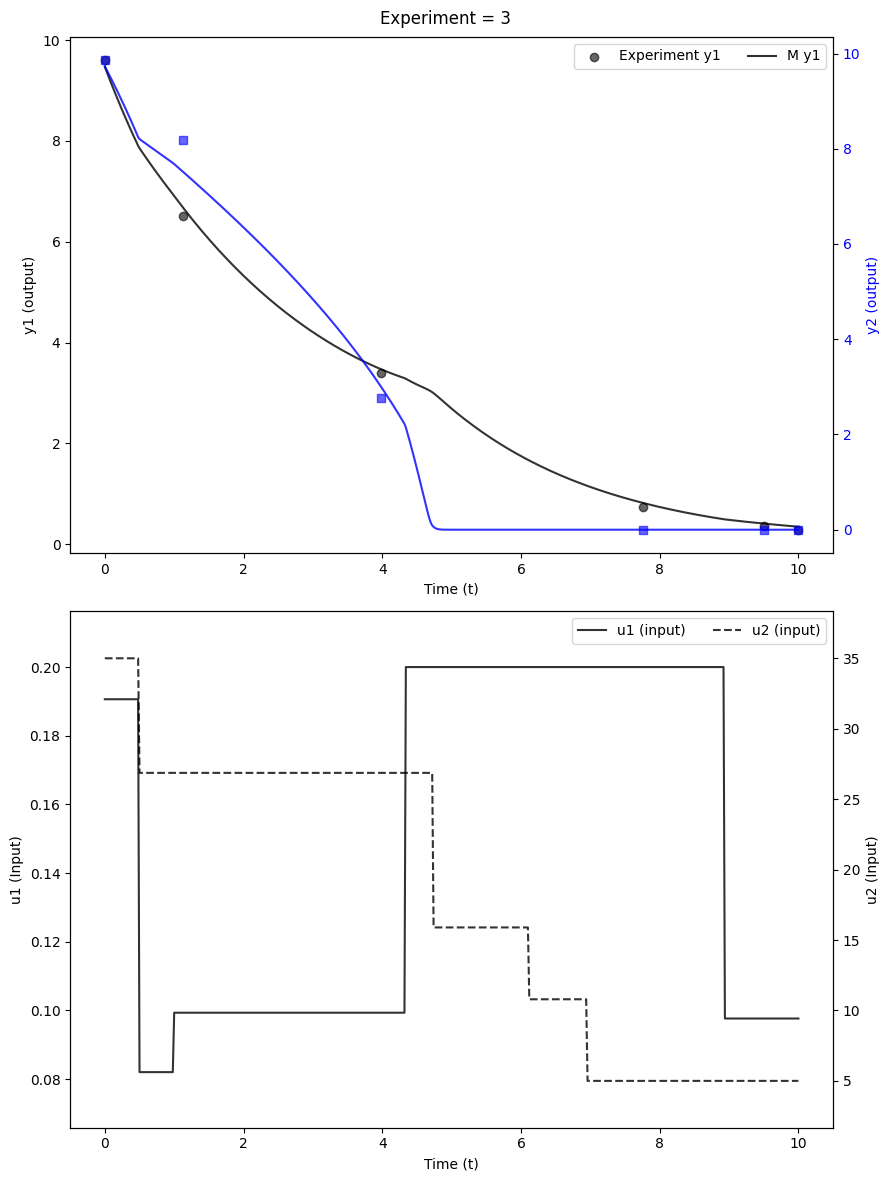

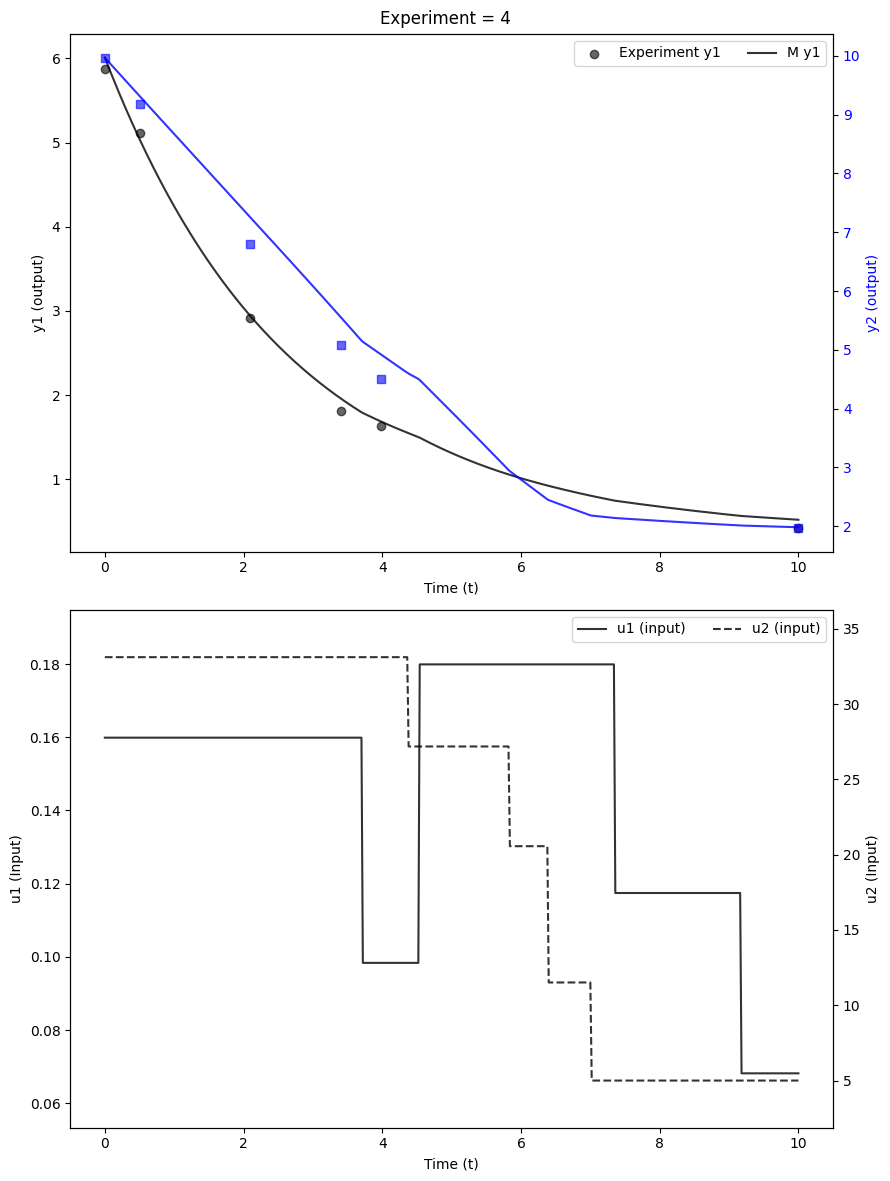

reference t value for model M and round 4: 2.016692199227824
estimated t values for model M and round 4: [17.91524144  2.36138684 16.2681688  42.53323778 48.88236851]
P-value for model M and round 4: 100.0
eps for model M and round 4: 0.0001



{'M': np.float64(2.016692199227824)}

In [40]:
round = 4
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [41]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\iden_results.jac


INFO:middoe.iden_utils:Starting pcomp_plot.


Loaded: iden_results.jac
File not found: sensa_results.jac


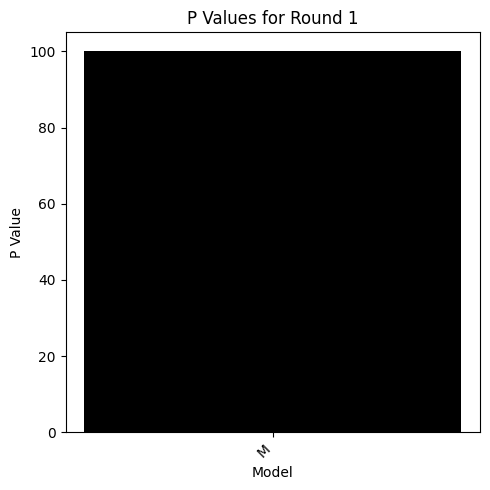

INFO:middoe.iden_utils:P values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\p_values_round_1.png.


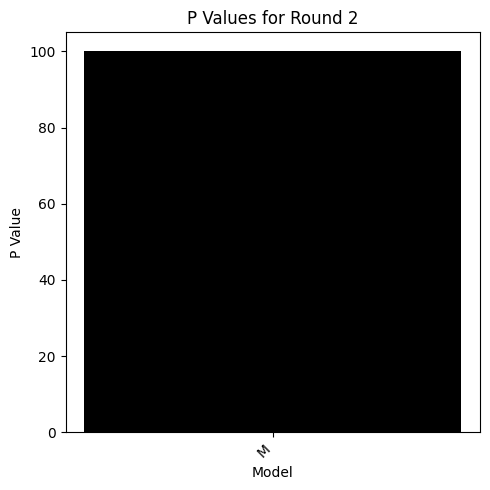

INFO:middoe.iden_utils:P values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\p_values_round_2.png.


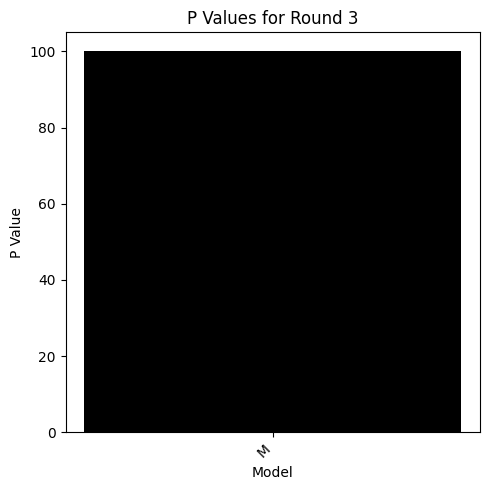

INFO:middoe.iden_utils:P values plot for Round 3 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\p_values_round_3.png.


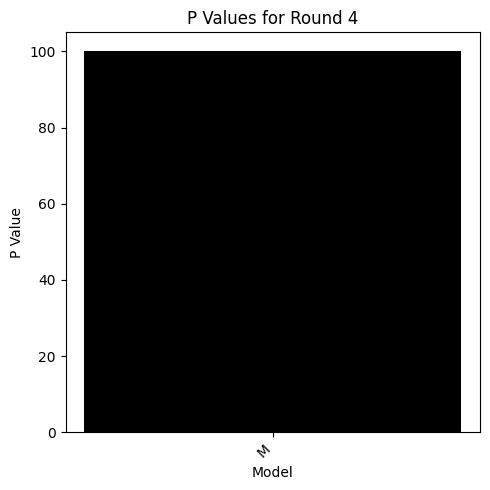

INFO:middoe.iden_utils:P values plot for Round 4 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\p_values_round_4.png.
INFO:middoe.iden_utils:Starting tcomp_plot.


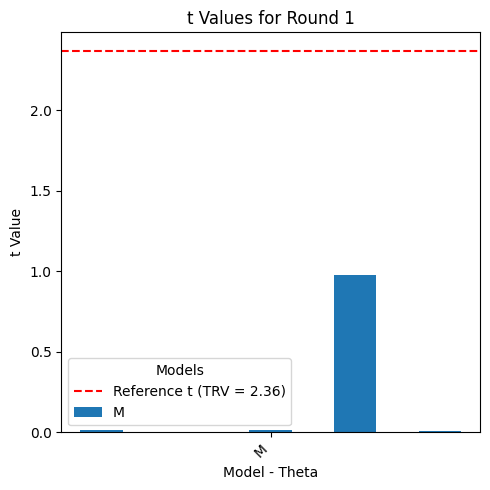

INFO:middoe.iden_utils:T values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\t_values_round_1.png.


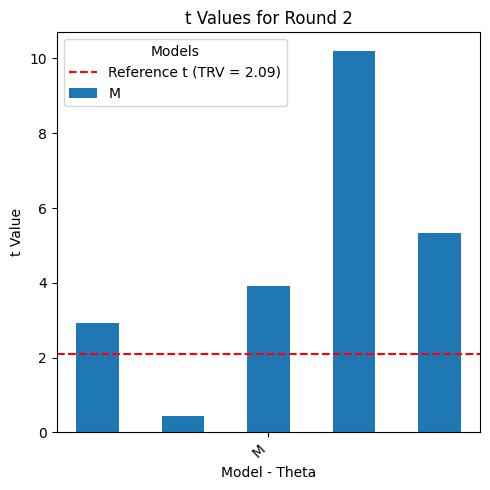

INFO:middoe.iden_utils:T values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\t_values_round_2.png.


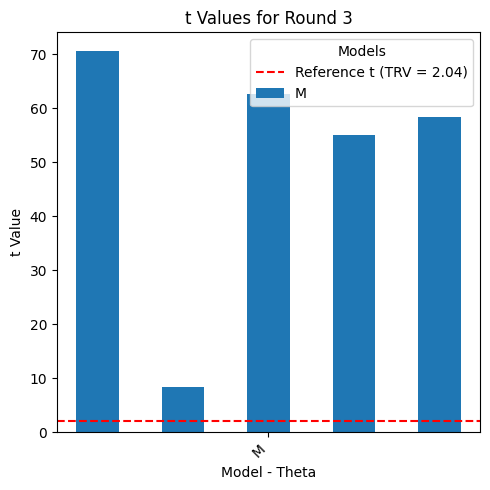

INFO:middoe.iden_utils:T values plot for Round 3 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\t_values_round_3.png.


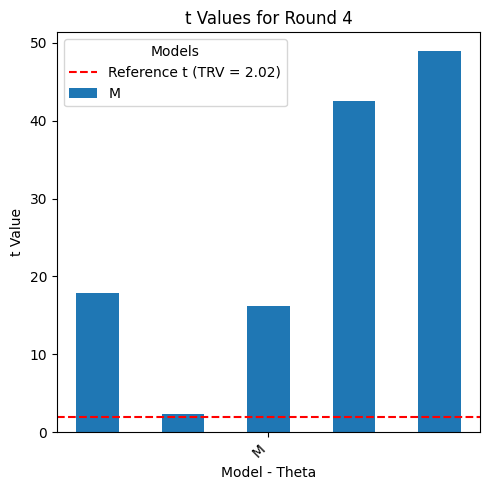

INFO:middoe.iden_utils:T values plot for Round 4 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\t_values_round_4.png.


Post-processing model: M


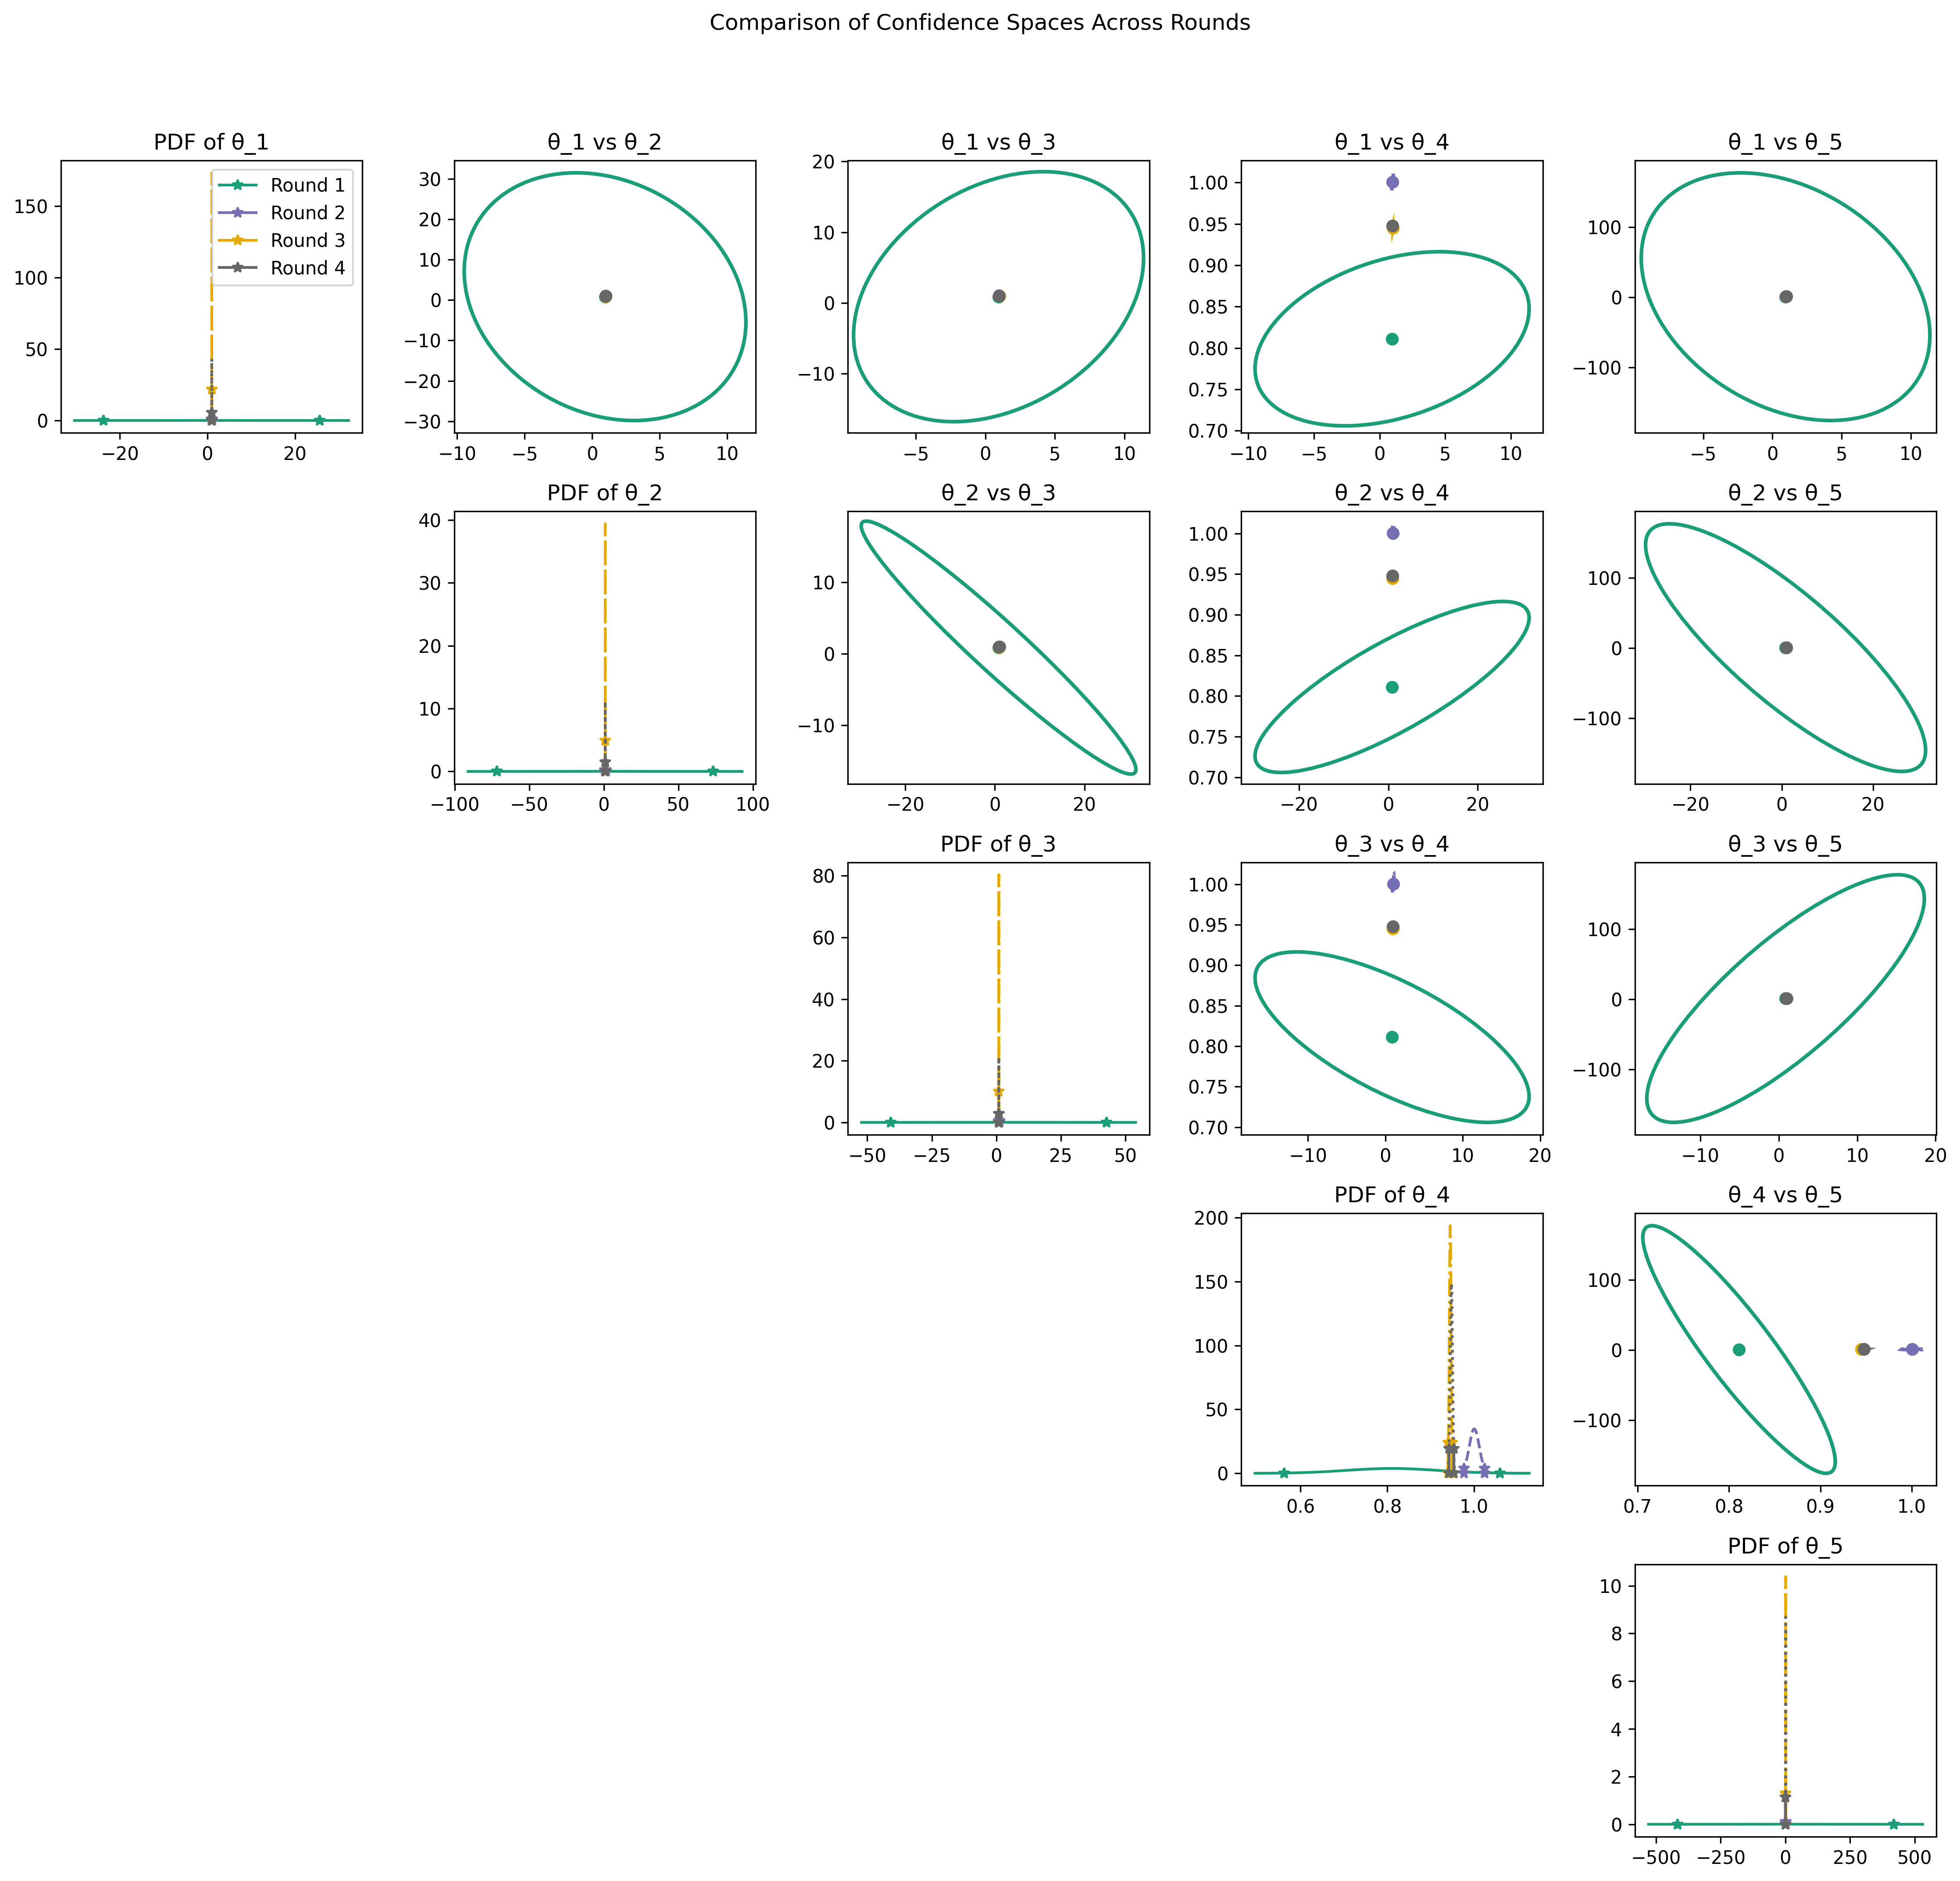

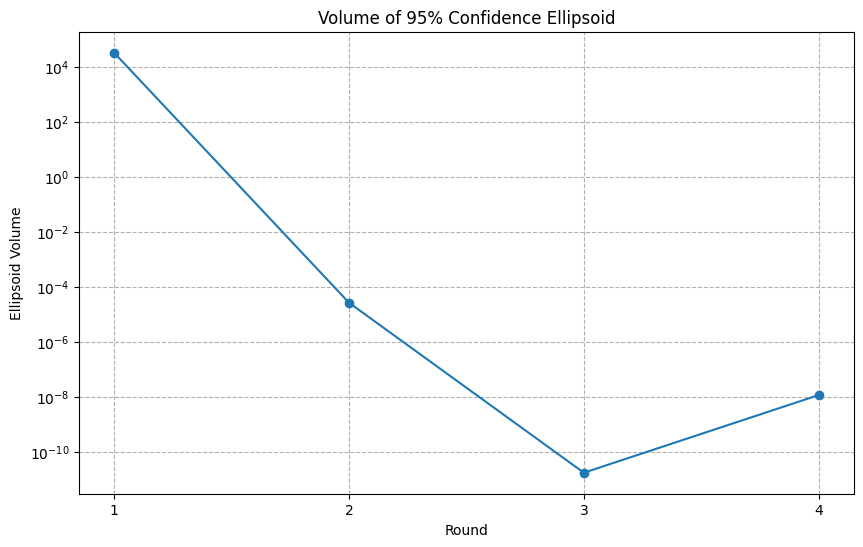

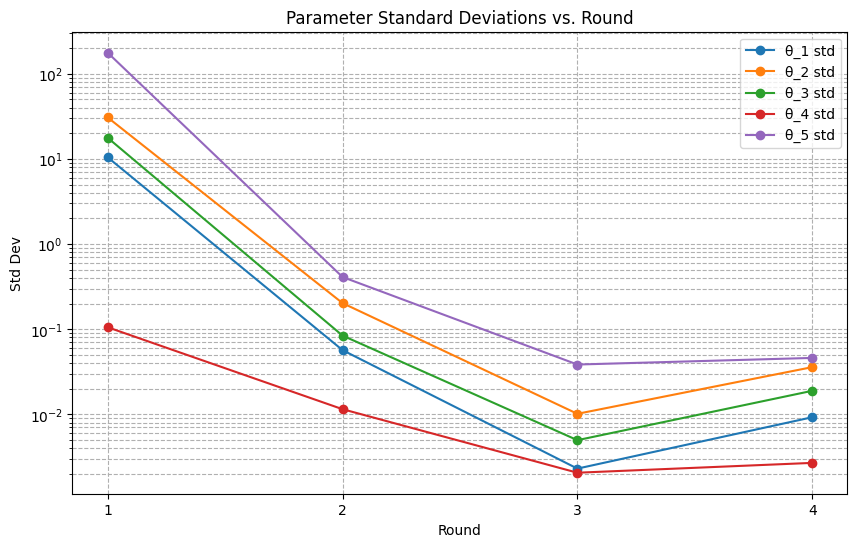

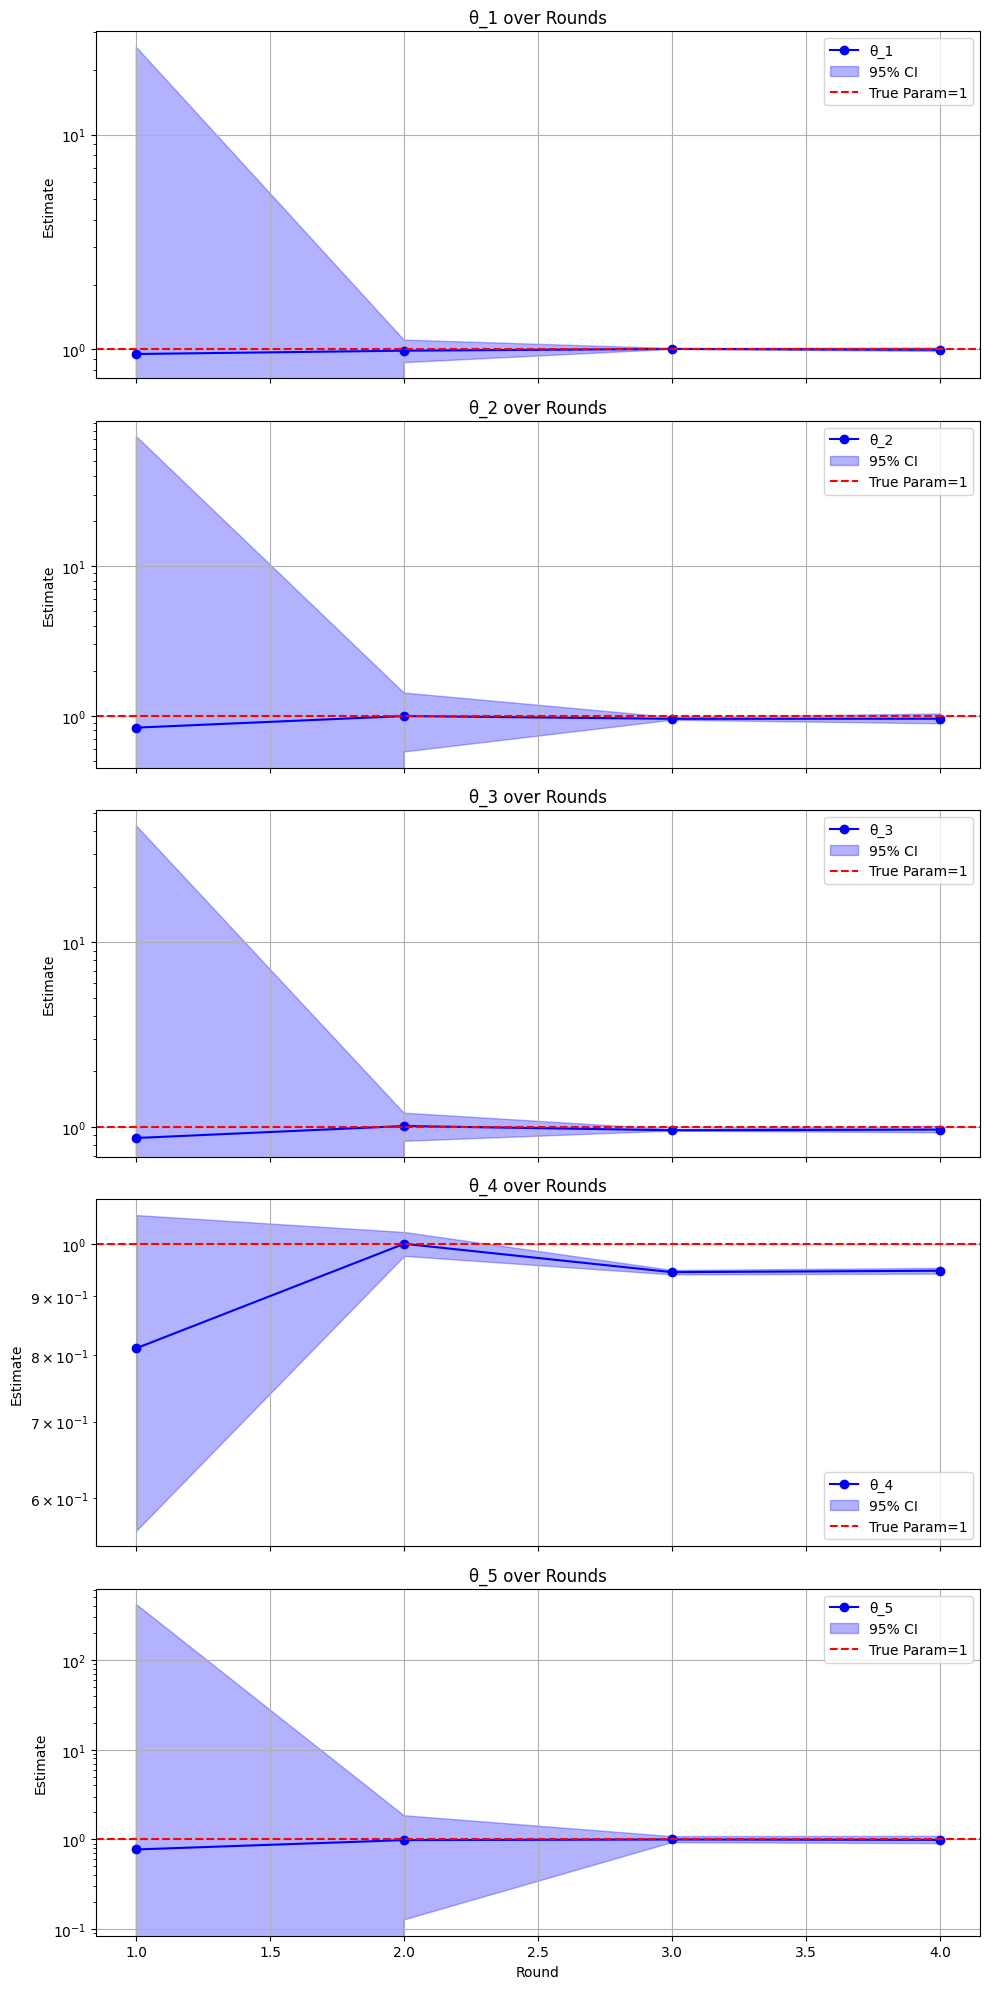

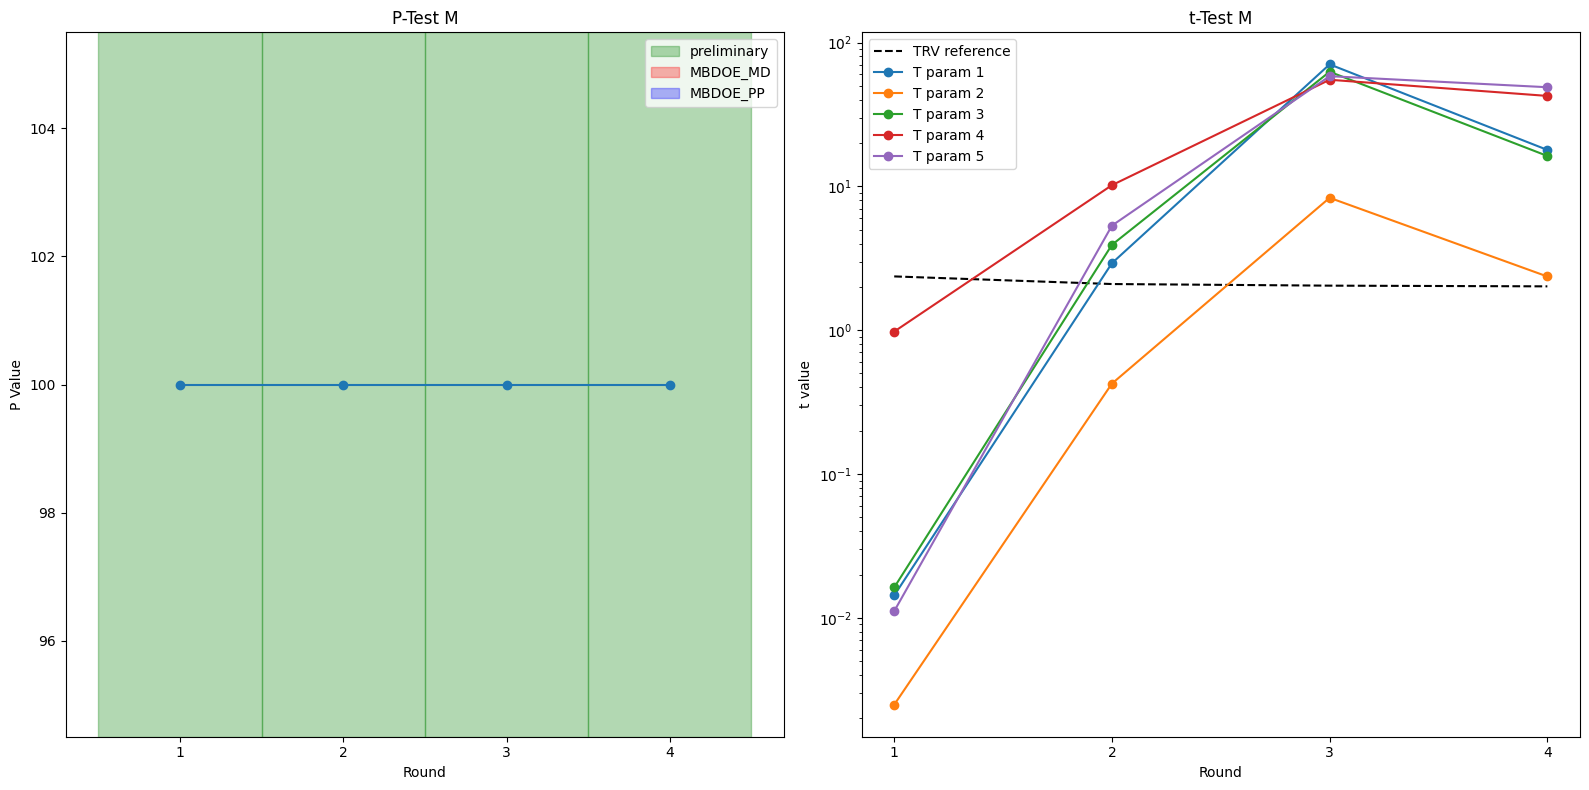

INFO:middoe.iden_utils:Reporter wrote data for Round 1 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\M_report_1.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 2 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\M_report_2.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 3 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\M_report_3.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 4 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\M_report_4.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\M_report_summary.txt'.


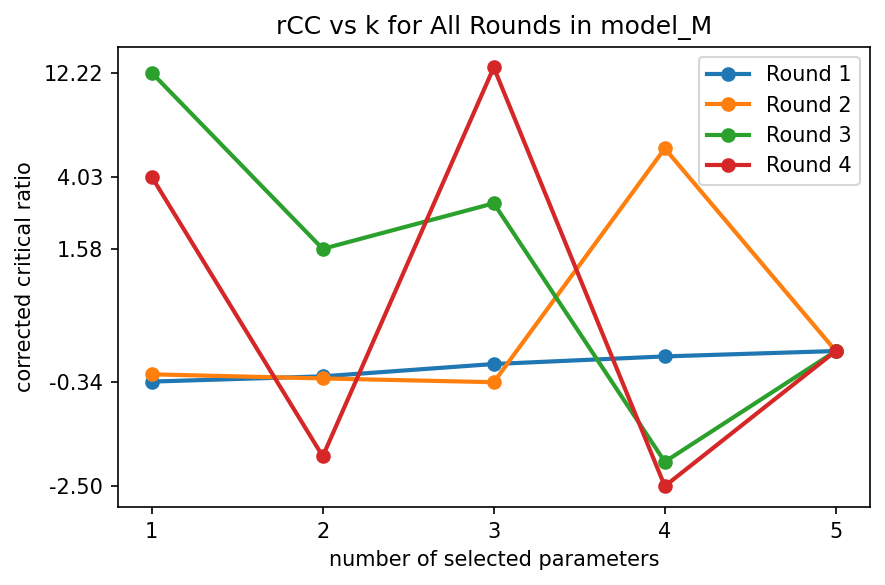

Plot saved in C:\Users\Tadmin\PycharmProjects\middoe\tests\poster2\case 2\post_processing\estimability
Post-processing completed for: M


In [42]:

from middoe.log_utils import load_from_jac

results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['M'],
    selected_rounds=[ 1, 2, 3, 4],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)